In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/akshit-srivastava/WATSON_ML_Integration/master/Prediction_for_Purchase_Agreement.csv')

In [3]:
# Reset the pandas dataframe index
data = data.reset_index(drop=True)
data.tail()
print (data.Date)
print (data.Consumed_Quantity)

0     2018-12-01
1     2018-11-01
2     2018-10-01
3     2018-09-01
4     2018-08-01
5     2018-07-01
6     2018-06-01
7     2018-05-01
8     2018-04-01
9     2018-03-01
10    2018-02-01
11    2018-01-01
12    2017-12-01
13    2017-11-01
14    2017-10-01
15    2017-09-01
16    2017-08-01
17    2017-07-01
18    2017-06-01
19    2017-05-01
20    2017-04-01
21    2017-03-01
22    2017-02-01
23    2017-01-01
Name: Date, dtype: object
0     1000
1     1000
2     1000
3     2000
4     3000
5     1000
6     1000
7      200
8     3000
9     3000
10    1000
11    1000
12     500
13    2000
14    2500
15    1000
16     500
17     900
18    2000
19    1000
20    3000
21     500
22    2000
23    1000
Name: Consumed_Quantity, dtype: int64


In [4]:
data.Date = pd.to_datetime(data.Date)
print(data.Date)

0    2018-12-01
1    2018-11-01
2    2018-10-01
3    2018-09-01
4    2018-08-01
5    2018-07-01
6    2018-06-01
7    2018-05-01
8    2018-04-01
9    2018-03-01
10   2018-02-01
11   2018-01-01
12   2017-12-01
13   2017-11-01
14   2017-10-01
15   2017-09-01
16   2017-08-01
17   2017-07-01
18   2017-06-01
19   2017-05-01
20   2017-04-01
21   2017-03-01
22   2017-02-01
23   2017-01-01
Name: Date, dtype: datetime64[ns]


In [16]:
data = data.set_index ('Date')
data.index

DatetimeIndex(['2018-12-01', '2018-11-01', '2018-10-01', '2018-09-01',
               '2018-08-01', '2018-07-01', '2018-06-01', '2018-05-01',
               '2018-04-01', '2018-03-01', '2018-02-01', '2018-01-01',
               '2017-12-01', '2017-11-01', '2017-10-01', '2017-09-01',
               '2017-08-01', '2017-07-01', '2017-06-01', '2017-05-01',
               '2017-04-01', '2017-03-01', '2017-02-01', '2017-01-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [17]:
y = data.Consumed_Quantity.resample('MS').mean()
print (y)

Date
2017-01-01    1000
2017-02-01    2000
2017-03-01     500
2017-04-01    3000
2017-05-01    1000
2017-06-01    2000
2017-07-01     900
2017-08-01     500
2017-09-01    1000
2017-10-01    2500
2017-11-01    2000
2017-12-01     500
2018-01-01    1000
2018-02-01    1000
2018-03-01    3000
2018-04-01    3000
2018-05-01     200
2018-06-01    1000
2018-07-01    1000
2018-08-01    3000
2018-09-01    2000
2018-10-01    1000
2018-11-01    1000
2018-12-01    1000
Freq: MS, Name: Consumed_Quantity, dtype: int64


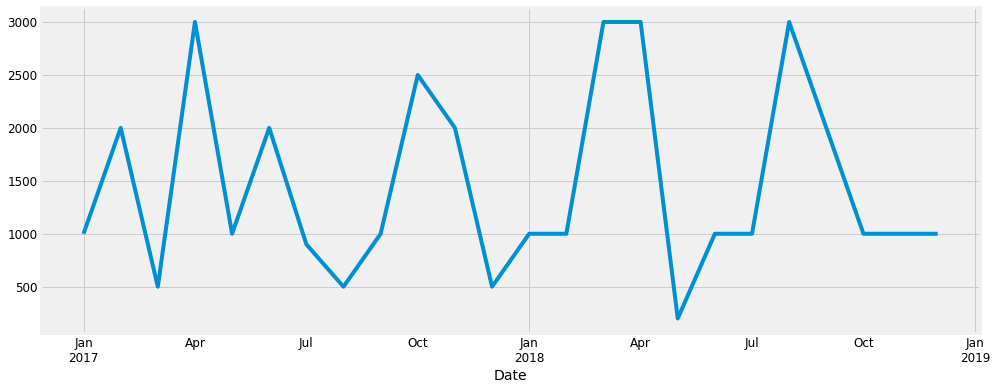

In [18]:
y.plot(figsize=(15, 6))
plt.show()

In [20]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [21]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:410.24595021882834
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:191.57062415231752
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:208.8616176776966
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:386.173915636257
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:176.70636606568837
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:208.70491173778933
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:380.7433073701113
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:181.65910954739638
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:192.88372315743632
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:351.80380030312364
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:158.62931124767422
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:190.5702083042114
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:395.9540843558132
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:193.56342180026115
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:193.24918655874833
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:371.50748111427123
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:177.86264380020867
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:192.7077724589153

In [22]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.574     -1.741      0.082      -2.125       0.125
sigma2      1.463e+06   3.92e-07   3.73e+12      0.000    1.46e+06    1.46e+06


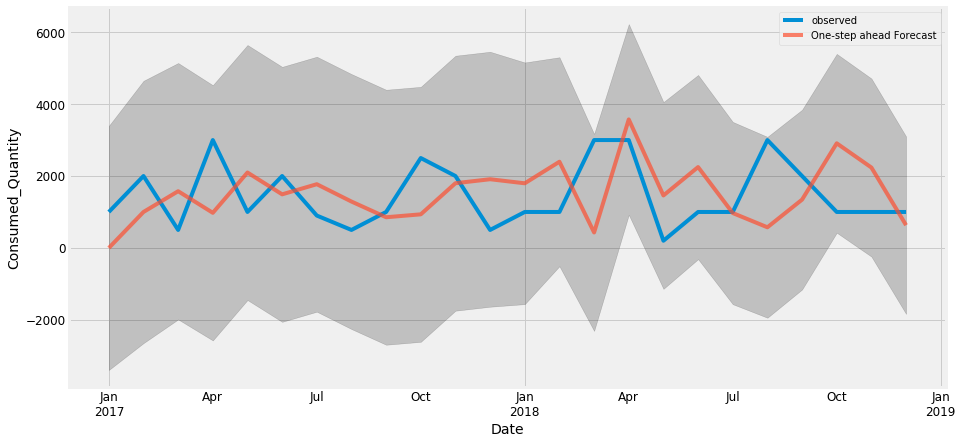

In [23]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Consumed_Quantity')
plt.legend()
plt.show()

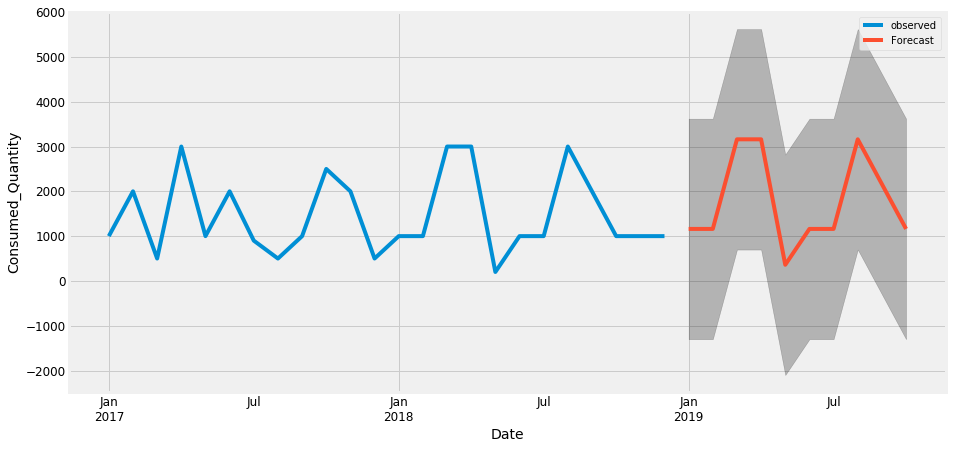

In [28]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Consumed_Quantity')
plt.legend()
plt.show()